In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
pd.set_option('future.no_silent_downcasting', True)

In [22]:
car_dataset=pd.read_csv("/kaggle/input/vehicle-dataset-from-cardekho/car data.csv")

In [23]:
car_dataset.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [24]:
car_dataset.shape

(301, 9)

In [25]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [26]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [27]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [29]:
#encoding categorical data
#fueltype columsn
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
#seller type
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
#transmiisoion
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [30]:
car_dataset.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,0,0
6,ciaz,2015,6.75,8.12,18796,0,0,0,0
7,s cross,2015,6.50,8.61,33429,1,0,0,0
8,ciaz,2016,8.75,8.89,20273,1,0,0,0
9,ciaz,2015,7.45,8.92,42367,1,0,0,0


In [31]:
#splitting
x=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
y=car_dataset['Selling_Price']

In [32]:
print(x)

     Year  Present_Price  Kms_Driven Fuel_Type Seller_Type Transmission  Owner
0    2014           5.59       27000         0           0            0      0
1    2013           9.54       43000         1           0            0      0
2    2017           9.85        6900         0           0            0      0
3    2011           4.15        5200         0           0            0      0
4    2014           6.87       42450         1           0            0      0
..    ...            ...         ...       ...         ...          ...    ...
296  2016          11.60       33988         1           0            0      0
297  2015           5.90       60000         0           0            0      0
298  2009          11.00       87934         0           0            0      0
299  2017          12.50        9000         1           0            0      0
300  2016           5.90        5464         0           0            0      0

[301 rows x 7 columns]


In [33]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [34]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [35]:
#model training
#linear Regression
model=LinearRegression()

In [36]:
model.fit(x_train,y_train)

LinearRegression()

In [40]:
training_data=model.predict(x_train)

In [41]:
#rsquare
error=metrics.r2_score(y_train,training_data)
print("rsq error",error)

rsq error 0.879945166049371


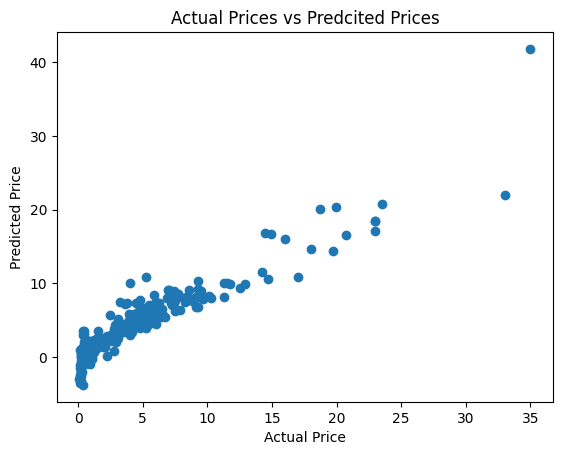

In [44]:
plt.scatter(y_train,training_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predcited Prices")
plt.show()


In [47]:
test_data=model.predict(x_test)
error=metrics.r2_score(y_test,test_data)
print("rsq error",error)

rsq error 0.8365766715027515


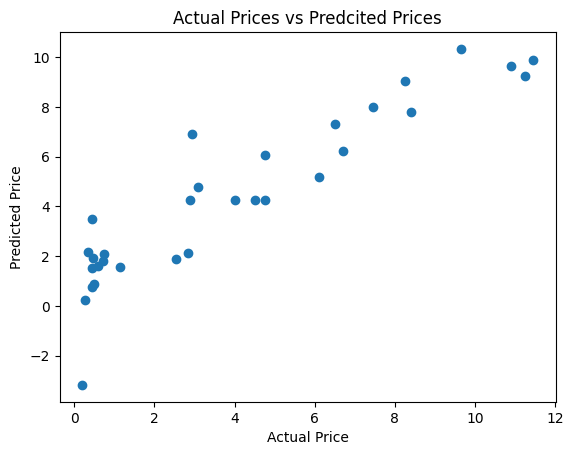

In [48]:
plt.scatter(y_test,test_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predcited Prices")
plt.show()


rsq error for y_train 0.8427856123435795
rsq error for y_test 0.8709167941173201


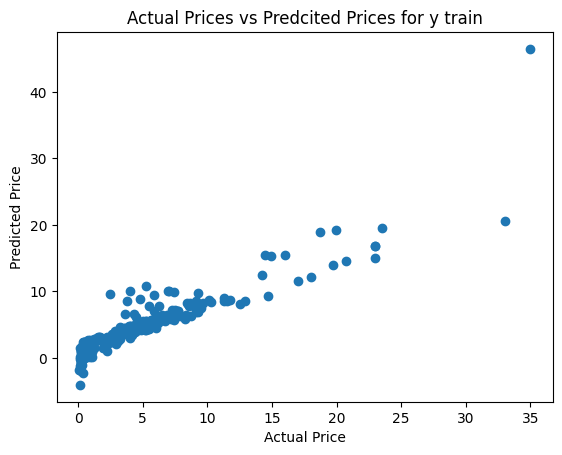

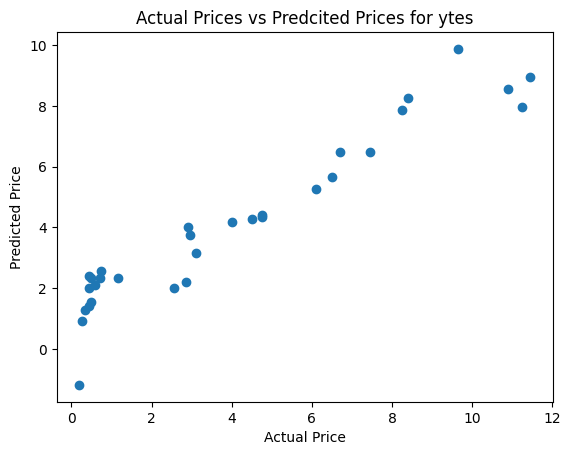

In [51]:
#model-2
#lasso-regression
model2=Lasso()
model2.fit(x_train,y_train)

training_data=model2.predict(x_train)
test_data=model2.predict(x_test)

#rsquareerror
error=metrics.r2_score(y_train,training_data)
print("rsq error for y_train",error)

error=metrics.r2_score(y_test,test_data)
print("rsq error for y_test",error)


plt.scatter(y_train,training_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predcited Prices for y train")
plt.show()

plt.scatter(y_test,test_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predcited Prices for ytes")
plt.show()
